In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from scipy import misc

In [20]:
img = scipy.misc.imread("../TileEM/COCO_train2014_000000000643.png")

In [21]:
shape(img)

(375, 500, 3)

In [24]:
r,g,b = img[(43,23)]

In [91]:
unique_vals = []
for x,y in zip(range(shape(img)[0]),range(shape(img)[1])):
    r,g,b = img[x,y,0],img[x,y,1],img[x,y,2]
    if [r,g,b] not in unique_vals:
        unique_vals.append([r,g,b])

In [121]:
tiles=[]
for i in range(len(unique_vals)):
    r,g,b = unique_vals[i]
    idx = np.where((img[:,:,0]==r)&(img[:,:,1]==g)&(img[:,:,2]==b))
    tiles.append(zip(*idx))
    #print "Check all PixTile unique:", len(np.unique(img[idx[0],idx[1]]))==3

In [135]:
np.random.shuffle(tiles)

In [136]:
mask = np.zeros(shape(img)[:2])
for tidx in range(len(tiles)):
    for i in list(tiles[tidx]):
        mask[i]=tidx

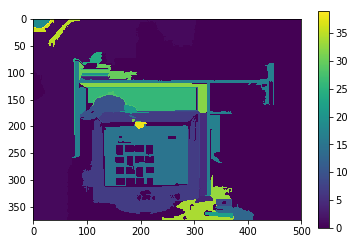

In [137]:
plt.imshow(mask)
plt.colorbar()

In [139]:
all_tidxs=set()
check2=True
for tidxs in tiles:
    if len(all_tidxs.intersection(tidxs))!=0:
        check2=False
    all_tidxs= all_tidxs.union(tidxs)
check1 =  len(all_tidxs)==np.prod(np.shape(img))

print "1. Set union of all index of all tiles is same as size of original image:",check1
print "2. None of the pixels lie in multiple tiles: ",check2

1. Set union of all index of all tiles is same as size of original image: False
2. None of the pixels lie in multiple tiles:  True
